# Simple MNIST Convnet
For more on Keras, check out [this example on the Keras.io website](https://keras.io/examples/vision/mnist_convnet/). 

For more on AITK-Keras, which is built on `numpy`, check out the [repo](https://github.com/ArtificialIntelligenceToolkit/aitk.keras).

The MNIST handwritten digit classification problem is a standard dataset used in computer vision and deep learning. It is considered the '_Hello, World!_' of machine learning. The example below shows an MNIST classification example using `aitk.keras`.

## Import `micropip`
Perhaps you are already familiar with `pip install`; this is the Pyodide equivalent.

In [ ]:
import micropip
await micropip.install("aitk.keras")

## Load required functions from `aitk.keras`

In [ ]:
from aitk.keras.layers import InputLayer, Dense, Activation
from aitk.keras.models import Sequential
from aitk.keras.datasets import mnist

## Load MNIST data from blob storage

In [ ]:
(x_train, y_train), (x_test, y_test) = await mnist.load_data_async()

Could not load dataset


In [ ]:
import os 

In [5]:
os.listdir()

['tmp', 'home', 'dev', 'proc', 'lib', 'bin', 'mnist.npz']

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train = x_train.reshape((60000, 28 * 28))
x_train.shape

(60000, 784)

## Plot first few images

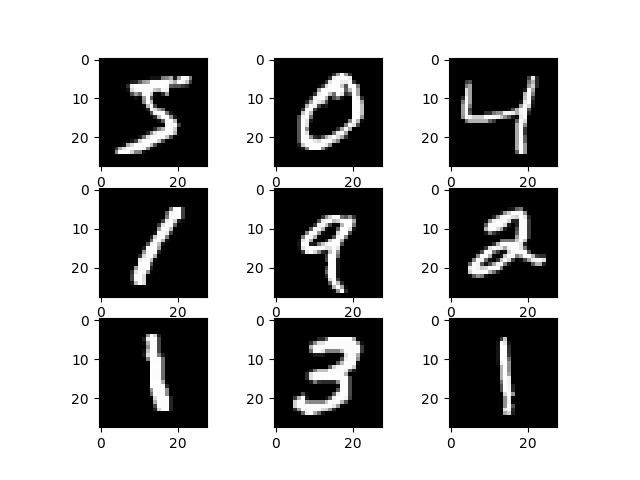

In [ ]:
from matplotlib import pyplot

for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(x_train[i].reshape((28, 28)), cmap=pyplot.get_cmap('gray'))
pyplot.show()

## Prepare the data

In [ ]:
import numpy as np

def onehot(v, width=10):
    m = np.zeros((len(v), width))
    m[np.arange(len(v)), v] = 1
    return m

In [ ]:
y_train = onehot(y_train)
y_test = onehot(y_test)

## Build the model

In [ ]:
def build_model():
    model = Sequential()
    model.add(InputLayer(28 * 28, name="input"))
    model.add(Dense(100, activation="tanh", name="hidden1"))
    model.add(Dense(25, activation="tanh", name="hidden2"))
    model.add(Dense(10, activation="sigmoid", name="output"))
    model.compile(optimizer="adam", loss="mse")
    return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
input (Input)                 (None, 784)                    0
_________________________________________________________________
hidden1 (Dense)               (None, 100)               78,500
_________________________________________________________________
hidden2 (Dense)                (None, 25)                2,525
_________________________________________________________________
output (Dense)                 (None, 10)                  260
Total params: 81,285
Trainable params: 81,285
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [ ]:
outputs = model.predict(x_train[:6000])

In [13]:
model.fit(x_train[:6000], y_train[:6000], epochs=10, batch_size=128)

Epoch 1/10
47/47 [==============================] - 0s 648µs/step - loss: 5.0850
Epoch 2/10
47/47 [==============================] - 0s 480µs/step - loss: 3.4459
Epoch 3/10
47/47 [==============================] - 0s 378µs/step - loss: 2.8273
Epoch 4/10
47/47 [==============================] - 0s 455µs/step - loss: 2.4016
Epoch 5/10
47/47 [==============================] - 0s 323µs/step - loss: 2.2670
Epoch 6/10
47/47 [==============================] - 0s 406µs/step - loss: 1.7357
Epoch 7/10
47/47 [==============================] - 0s 413µs/step - loss: 1.9034
Epoch 8/10
47/47 [==============================] - 0s 339µs/step - loss: 1.6137
Epoch 9/10
47/47 [==============================] - 0s 859µs/step - loss: 1.5593
Epoch 10/10
47/47 [==============================] - 0s 345µs/step - loss: 1.1776


## Evaluate the trained model

In [ ]:
outputs = model.predict(x_train[:6000])

In [ ]:
total = 0
correct = 0
for target, output in zip(y_train[:6000], outputs):
    answer = target.argmax()
    predict = output.argmax()
    if answer == predict:
        correct += 1 
    total += 1
print(correct / total * 100)

77.61666666666667


In [16]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
from PIL import Image

In [18]:
Image.fromarray(x_train[1].reshape((28, 28)))

In [19]:
outputs[1]

array([0.9021938 , 0.00793693, 0.09861197, 0.02003016, 0.06453847,
       0.02497163, 0.08057448, 0.06379916, 0.14137638, 0.06919791])